import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
style.use("dark_background")
%matplotlib inline
qasm_sim = q.Aer.get_backend("qasm_simulator")
statevec_sim = q.Aer.get_backend("statevector_simulator")

# Uncertain Qubits

In [17]:
# Uncertain qubits don't collapse on same value
c = q.QuantumCircuit(2, 2)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
orig_statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌──────────┐┌─┐   
q_0: |0>┤ Ry(pi/4) ├┤M├───
        ├──────────┤└╥┘┌─┐
q_1: |0>┤ Ry(pi/4) ├─╫─┤M├
        └──────────┘ ║ └╥┘
 c_0: 0 ═════════════╩══╬═
                        ║ 
 c_1: 0 ════════════════╩═

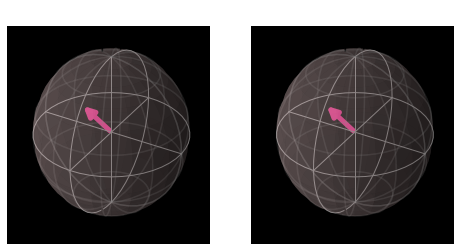

In [18]:
plot_bloch_multivector(orig_statevec)

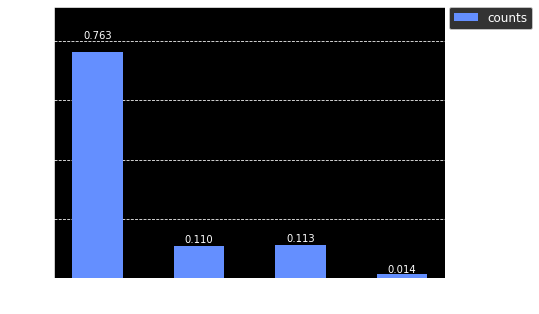

In [19]:
orig_counts = q.execute(c, backend = qasm_sim, shots = 1024).result().get_counts()
plot_histogram([orig_counts], legend = ['counts'])

# Uncertain Qubits, Hadamards at front

In [20]:
c = q.QuantumCircuit(2, 2)
# Putting qubits in superposition
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌───┐┌──────────┐┌─┐   
q_0: |0>┤ H ├┤ Ry(pi/4) ├┤M├───
        ├───┤├──────────┤└╥┘┌─┐
q_1: |0>┤ H ├┤ Ry(pi/4) ├─╫─┤M├
        └───┘└──────────┘ ║ └╥┘
 c_0: 0 ══════════════════╩══╬═
                             ║ 
 c_1: 0 ═════════════════════╩═

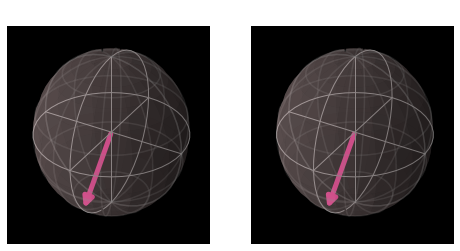

In [21]:
plot_bloch_multivector(statevec)

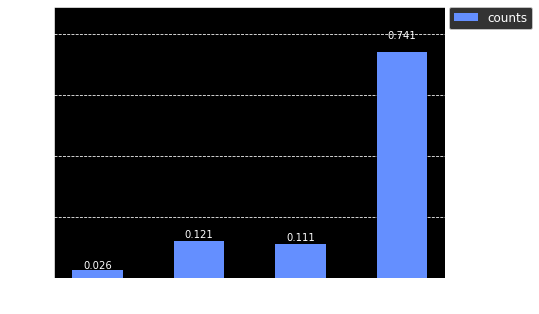

In [23]:
counts = q.execute(c, backend = qasm_sim, shots = 1024).result().get_counts()
plot_histogram([counts], legend = ['counts'])

# Hadamard Sandwich

In [25]:
c = q.QuantumCircuit(2, 2)
# Putting qubits in superposition
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌───┐┌──────────┐┌───┐┌─┐   
q_0: |0>┤ H ├┤ Ry(pi/4) ├┤ H ├┤M├───
        ├───┤├──────────┤├───┤└╥┘┌─┐
q_1: |0>┤ H ├┤ Ry(pi/4) ├┤ H ├─╫─┤M├
        └───┘└──────────┘└───┘ ║ └╥┘
 c_0: 0 ═══════════════════════╩══╬═
                                  ║ 
 c_1: 0 ══════════════════════════╩═

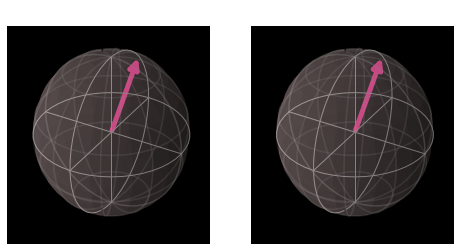

In [26]:
plot_bloch_multivector(statevec)

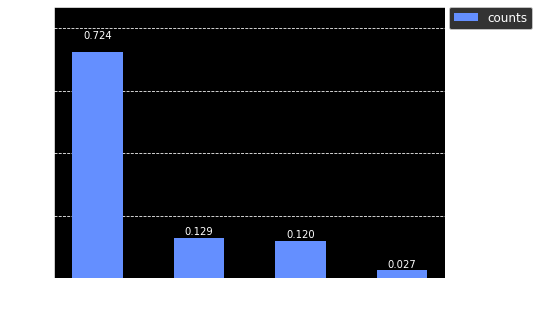

In [27]:
counts = q.execute(c, backend = qasm_sim, shots = 1024).result().get_counts()
plot_histogram([counts], legend = ['counts'])

# Certain Qubits

In [28]:
c = q.QuantumCircuit(2, 2)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌───┐┌─┐   
q_0: |0>┤ X ├┤M├───
        ├───┤└╥┘┌─┐
q_1: |0>┤ X ├─╫─┤M├
        └───┘ ║ └╥┘
 c_0: 0 ══════╩══╬═
                 ║ 
 c_1: 0 ═════════╩═

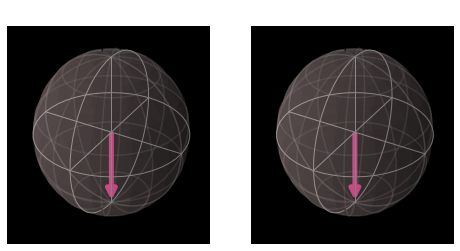

In [29]:
plot_bloch_multivector(orig_statevec)
# Collapses to |1> always

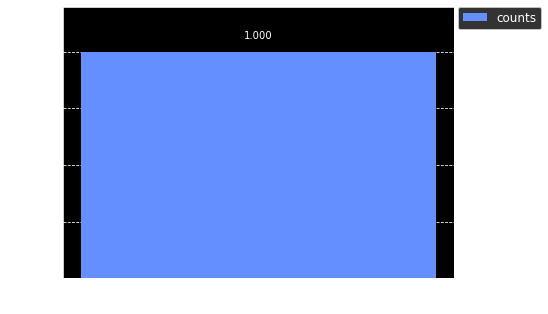

In [30]:
orig_counts = q.execute(c, backend = qasm_sim, shots = 1024).result().get_counts()
plot_histogram([orig_counts], legend = ['counts'])
# Distribution shows us we always get 11.

# Hadamard in front of certain qubits

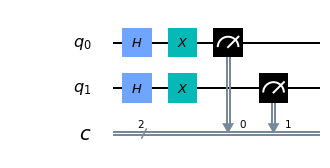

In [31]:
c = q.QuantumCircuit(2, 2)
# Both put to Superposition
c.h(0)
c.h(1)
c.x(0)
c.x(1)
statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw(output='mpl')

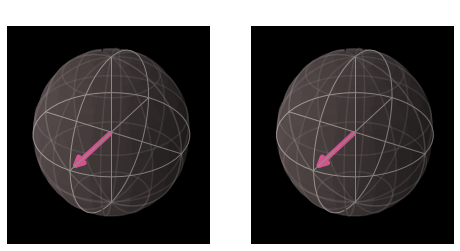

In [32]:
plot_bloch_multivector(statevec)

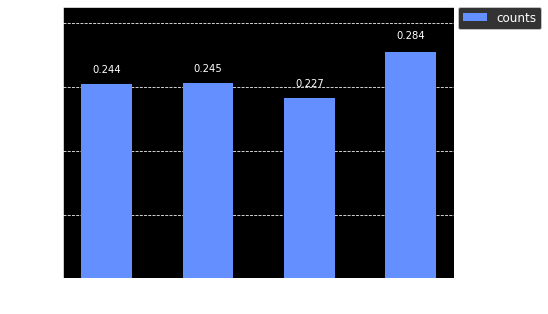

In [33]:
counts = q.execute(c, backend = qasm_sim, shots = 1024).result().get_counts()
plot_histogram([counts], legend = ['counts'])
# Equal Distribution

# Hadamard sandwich for certain qubits

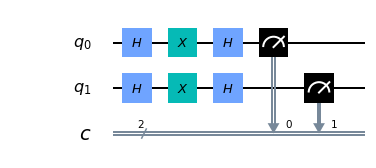

In [34]:
c = q.QuantumCircuit(2, 2)
# Both put to Superposition
c.h(0) # hadamard
c.h(1) # hadamard
c.x(0)
c.x(1)
c.h(0) # hadamard
c.h(1) # hadamard
statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw(output='mpl')

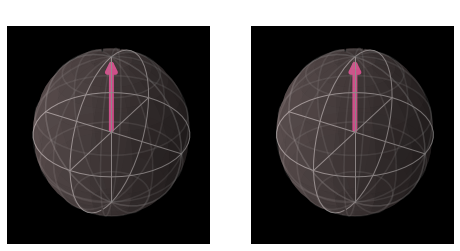

In [35]:
plot_bloch_multivector(statevec)
# Collapses to |0> always

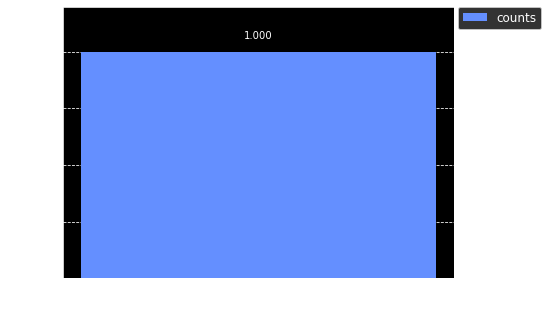

In [36]:
orig_counts = q.execute(c, backend = qasm_sim, shots = 1024).result().get_counts()
plot_histogram([orig_counts], legend = ['counts'])
# Distribution shows us we always get 00.

# Deutsch Jozsa Algorithm

Now given a string of n bits passing through a black box determine whether the black box is constant or balanced.
Main moto is not finding the nature of the black box but the fact that how can all possible inputs be processed in just 1 pass.
0,0 means blackbox is constant 1,1 means blackbox is balanced

In [46]:
def balanced_black_box(c):
    c.cx(0, 2)
    c.cx(1, 2)
    return c

def constant_black_box(c):
    return c

# Hadamard Sandwich

In [49]:
c = q.QuantumCircuit(3, 2) # We don't care about the 3rd qubit
c.h(0)
c.h(1)
c.h(2)
c = balanced_black_box(c)
c.h(0)
c.h(1)
#c.h(2)
c.draw()

┌───┐     ┌───┐     
q_0: |0>┤ H ├──■──┤ H ├─────
        ├───┤  │  └───┘┌───┐
q_1: |0>┤ H ├──┼────■──┤ H ├
        ├───┤┌─┴─┐┌─┴─┐└───┘
q_2: |0>┤ H ├┤ X ├┤ X ├─────
        └───┘└───┘└───┘     
 c_0: 0 ════════════════════
                            
 c_1: 0 ════════════════════

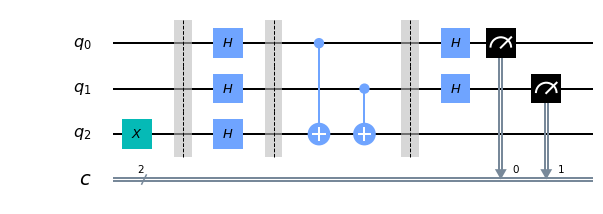

In [52]:
# Creating a balanced blackbox
c = q.QuantumCircuit(3, 2) # We don't care about the 3rd qubit
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
#c.h(2)
c.measure([0, 1], [0, 1])
c.draw(output = 'mpl')

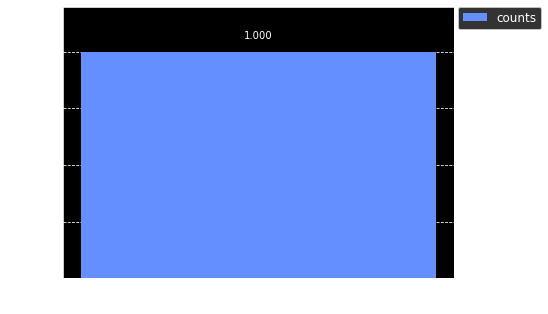

In [54]:
counts = q.execute(c, backend = qasm_sim, shots = 1).result().get_counts()
plot_histogram([counts], legend = ['counts'])
# 1,1 means its a balanced circuit

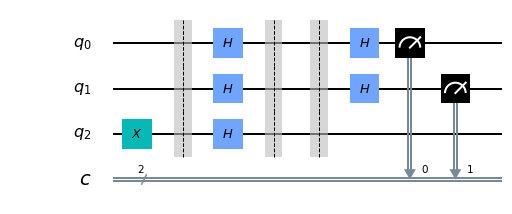

In [55]:
# Creating a constant blackbox
c = q.QuantumCircuit(3, 2) # We don't care about the 3rd qubit
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
#c.h(2)
c.measure([0, 1], [0, 1])
c.draw(output = 'mpl')

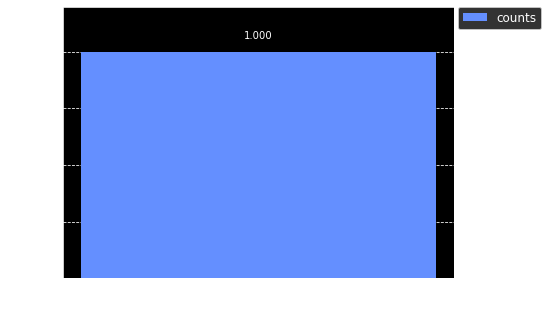

In [58]:
counts = q.execute(c, backend = qasm_sim, shots = 1).result().get_counts()
plot_histogram([counts], legend = ['counts'])
# 0,0 means its a balanced circuit

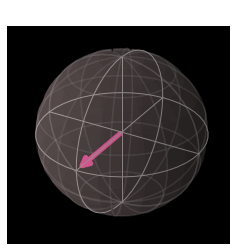

In [61]:
c = q.QuantumCircuit(1, 1)
c.h(0)
# hadamard puts qubit in superposition(equal probability of 0 & 1)
statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

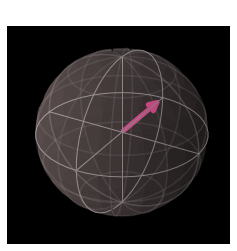

In [59]:
c = q.QuantumCircuit(1, 1)
c.x(0)
# not gate applied then hadamard so rotates to the negative axis
c.h(0)
statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

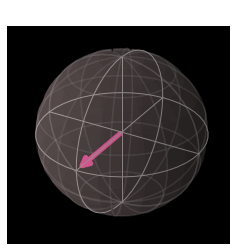

In [60]:
c = q.QuantumCircuit(1, 1)
c.h(0)
c.x(0)
# Hadamard puts the qubit in superposition (equal chance of 0 & 1).After not gate still in superposition(equal chance of 1 & 0)
statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

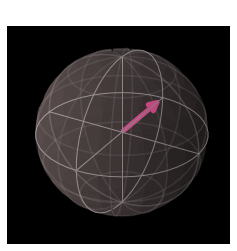

In [67]:
# Rotating multivector on y axis we could achieve negative axis before or after superposition
c = q.QuantumCircuit(1, 1)
#c.ry(math.pi, 0)
c.h(0)
c.ry(math.pi, 0)
statevec = q.execute(c, backend = statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)